In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import os
from tqdm import tqdm

In [40]:
c1="data/Control/002.wav"

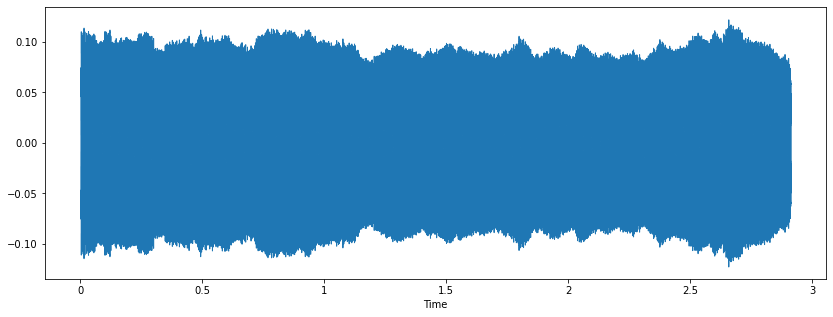

In [97]:
plt.figure(figsize=(14,5))
data, s_rate = librosa.load(c1)
librosa.display.waveshow(data, sr=s_rate)
ipd.Audio(c1)

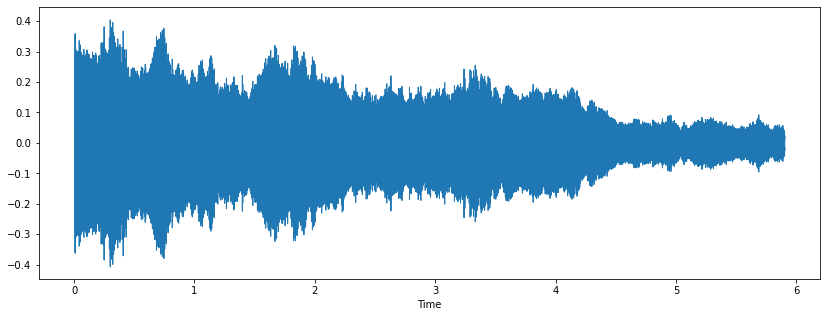

In [98]:
p1="./data/Pathology/008.wav"

plt.figure(figsize=(14,5))
data, s_rate = librosa.load(p1)
librosa.display.waveshow(data, sr=s_rate)
ipd.Audio(p1)

In [3]:
df_c=pd.DataFrame(columns=["file_name", "label"])
df_p=pd.DataFrame(columns=["file_name", "label"])

In [5]:
dir="./data/Control/"
for index, audio in enumerate(os.listdir(dir)):
    df_c.loc[index]=[audio, 0]
    
dir="./data/Pathology/"
for index, audio in enumerate(os.listdir(dir)):
    df_p.loc[index]=[audio, 1]



In [81]:
df_p.shape

(15, 2)

In [82]:
df_c.shape

(39, 2)

## Mel-Frequency Cepstral Coefficients

In [83]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=ado, sr=s_rate, n_mfcc=40)
    mfccs_scalerd_features = np.mean(mfccs_feature.T, axis=0)
    
    return mfccs_scalerd_features

In [84]:
from tqdm import tqdm

In [ ]:
extracted_features=[]

In [86]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:04,  8.43it/s]


In [88]:
dir="./data/"
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:01,  9.20it/s]


In [89]:
len(extracted_features)

54

In [93]:
df_mfcc=pd.DataFrame(extracted_features, columns=["features", "label"])

In [94]:
df_mfcc.head()

,features,label
0,"[-392.40155, 133.72397, -50.19586, -0.82007295...",0
1,"[-512.7883, 139.86249, 31.555986, -0.6664397, ...",0
2,"[-340.54868, 205.63968, -34.992283, -11.825129...",0
3,"[-304.81964, 201.13249, -34.484234, -4.077513,...",0
4,"[-331.87054, 161.13939, -73.772224, -7.4736934...",0


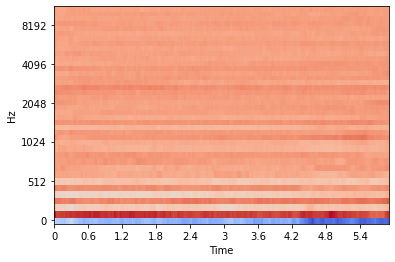

In [214]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mfccs_feature = librosa.feature.mfcc(y=ado, sr=s_rate, n_mfcc=40)

librosa.display.specshow(mfccs_feature, x_axis='time', y_axis="mel")

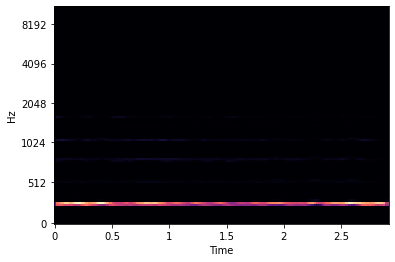

In [216]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate)

librosa.display.specshow(mels_feature, x_axis='time', y_axis="mel")

# Mel-Spectrogram

In [27]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate, n_fft=2048, hop_length=512, n_mels=128)
    mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)
    
    return mels_scaled_features

In [28]:
extracted_features=[]

In [29]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:02, 18.34it/s]


In [30]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:00, 20.72it/s]


In [31]:
len(extracted_features)

54

In [32]:
df_mels=pd.DataFrame(extracted_features, columns=["features", "label"])

In [33]:
df_mels.head()

,features,label
0,"[[-10.68359, -16.844574, -32.675365, -32.4191,...",0
1,"[[-6.558672, -11.825319, -24.571693, -21.47208...",0
2,"[[-20.04038, -26.369356, -36.076824, -35.26978...",0
3,"[[-18.330952, -23.114395, -50.74783, -47.66944...",0
4,"[[-16.925192, -23.656057, -38.619347, -39.9146...",0


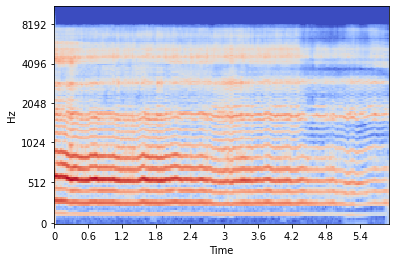

In [207]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate, n_fft=2048, hop_length=512, n_mels=128)
mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)

librosa.display.specshow(mels_scaled_features, x_axis='time', y_axis="mel")

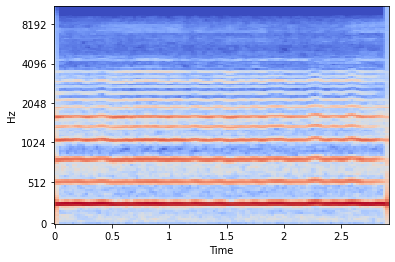

In [208]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate)
mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)

librosa.display.specshow(mels_scaled_features, x_axis='time', y_axis="mel")

# Spectral centroid

In [108]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [109]:
from sklearn.preprocessing import minmax_scale

In [120]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sc_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)
    return sc_feature

In [121]:
extracted_features=[]

In [122]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:03, 10.43it/s]


In [123]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:01, 11.71it/s]


In [124]:
len(extracted_features)

54

In [125]:
df_sc=pd.DataFrame(extracted_features, columns=["features", "label"])

In [126]:
df_sc.head()

,features,label
0,"[[1399.5754053062628, 1177.957573028576, 1007....",0
1,"[[1326.6273637729066, 1036.4236821818427, 902....",0
2,"[[1108.0253990224428, 917.2997014275633, 762.0...",0
3,"[[994.8205075232106, 879.485255231032, 799.131...",0
4,"[[1103.0010121528735, 1082.4636699755456, 1083...",0


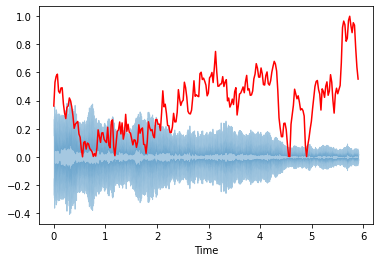

In [93]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

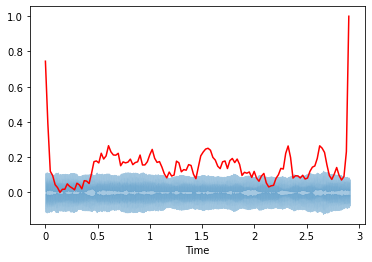

In [94]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

# Spectral_bandwidth

In [163]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [164]:
from sklearn.preprocessing import minmax_scale

In [168]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sb_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]
    sb_normal = normalize(sc_feature)
    return sb_normal

In [169]:
extracted_features=[]

In [170]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:03, 10.30it/s]


In [171]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:01, 11.71it/s]


In [172]:
len(extracted_features)

54

In [173]:
df_sb=pd.DataFrame(extracted_features, columns=["features", "label"])

In [174]:
df_sb.head()

,features,label
0,"[0.9863269751407078, 1.0, 0.7638148100856545, ...",0
1,"[0.9863269751407078, 1.0, 0.7638148100856545, ...",0
2,"[0.9863269751407078, 1.0, 0.7638148100856545, ...",0
3,"[0.9863269751407078, 1.0, 0.7638148100856545, ...",0
4,"[0.9863269751407078, 1.0, 0.7638148100856545, ...",0


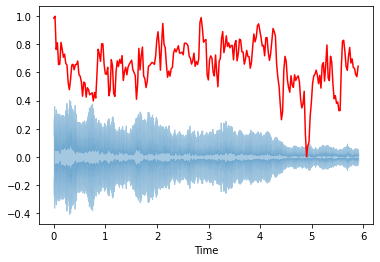

In [137]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

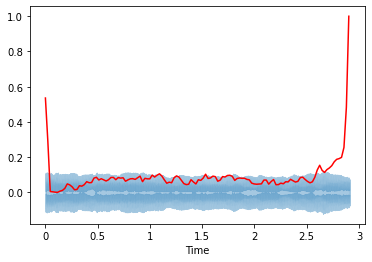

In [96]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

# RMS

In [190]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    rms_feature = librosa.feature.rms(y=ado)[0]
    return sc_feature

In [191]:
extracted_features=[]

In [192]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:02, 13.09it/s]


In [193]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:01, 14.98it/s]


In [194]:
len(extracted_features)

54

In [195]:
df_rms=pd.DataFrame(extracted_features, columns=["features", "label"])

In [196]:
df_rms.head()

,features,label
0,"[2109.657098575484, 2115.957397428446, 2007.12...",0
1,"[2109.657098575484, 2115.957397428446, 2007.12...",0
2,"[2109.657098575484, 2115.957397428446, 2007.12...",0
3,"[2109.657098575484, 2115.957397428446, 2007.12...",0
4,"[2109.657098575484, 2115.957397428446, 2007.12...",0


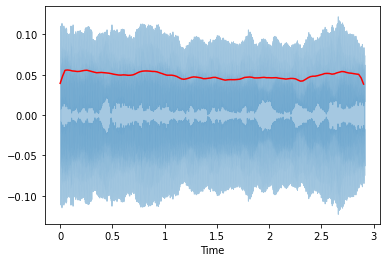

In [197]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
rms_feature = librosa.feature.rms(y=ado)[0]

frames = range(len(rms_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, rms_feature, color='r')
plt.show()

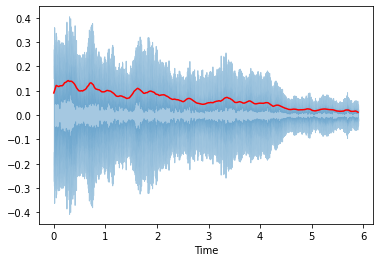

In [198]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
rms_feature = librosa.feature.rms(y=ado)[0]

frames = range(len(rms_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, rms_feature, color='r')
plt.show()